11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 70s 73ms/step - loss: 0.1666 - accuracy: 0.9493
Epoch 2/5
938/938 [==============================] - 66s 71ms/step - loss: 0.0497 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 66s 71ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0247 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 66s 70ms/step - loss: 0.0200 - accuracy: 0.9935


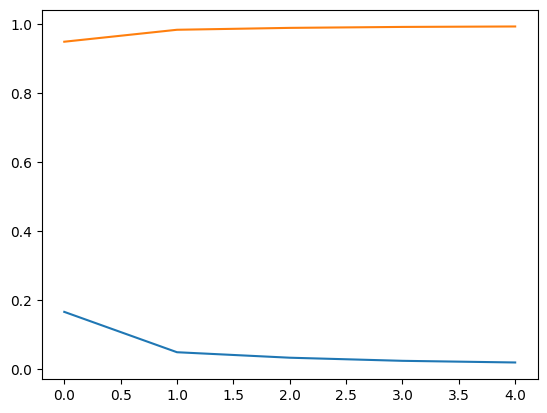

313/313 [==============================] - 4s 11ms/step - loss: 0.0289 - accuracy: 0.9901


[0.02887708507478237, 0.9901000261306763]

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# mnist(필기체) 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000,28,28,1)) # 60000의 이미지를 26 x 26 형태 저장, 흑백 이미지일 경우 1을 추가(컬러는 3)
train_images = train_images.astype('float32') / 255 # 이미지의 값을 0~1 사이의 픽셀값으로 변환하기 위해 255로 나눔(스케일링)

test_images = test_images.reshape((10000,28,28,1)) # 위와 같이 10000장 데이터를 처리
test_images = test_images.astype('float32') / 255 # 스케일링 작업

# to_categorical 함수를 통해 정답 데이터를 1차원 배열로 출력
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 모델 생성
model = models.Sequential(name = 'Nsu_CNN') # Nsu_CNN 모델 생성
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1), padding = 'same')) # 이미지 처리에 쓰이는 레이어, (3, 3) 크기의 필터 32개를 사용, 패딩 사용(same)
model.add(layers.MaxPooling2D((2, 2))) # (2, 2) 크기의 픽셀 중 최대값을 반환, 크기 줄이기
model.add(layers.Conv2D(64, (3, 3), activation = 'relu',  padding = 'same')) # 필터 64개를 사용하여 한번 더 처리, 활성화 함수는 앞과 같이 relu(시그모이드)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # 1차원 데이터로 변환
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) # 다중 분류이므로 softmax

# 모델 시각화
plot_model(model, show_shapes = True, to_file = "NSU_CNN.jpg", dpi = 300) # show_shapes는 입출값 표시 여부, to_file은 파일 이름, dpi는 이미지 화소

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

# 모델 훈련
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

# 손실률, 정확도 그래프 표시
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

# 모델 평가
model.evaluate(test_images, test_labels)

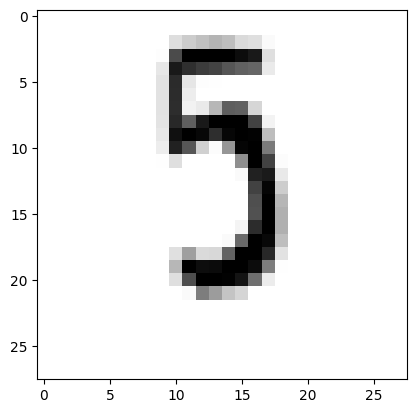

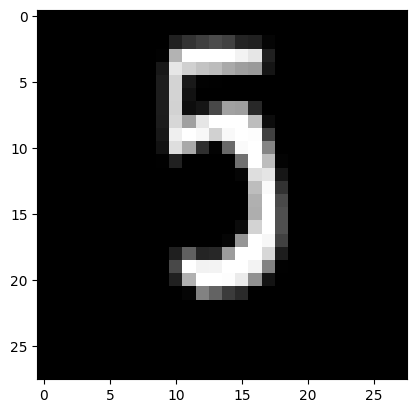

1/1 [==============================] - 0s 107ms/step
[[2.5617045e-03 9.4295777e-03 2.3649839e-01 5.1226568e-01 8.0762002e-06
  3.2271639e-02 9.3747849e-06 1.9081977e-01 3.1677869e-04 1.5819032e-02]]
1/1 [==============================] - 0s 21ms/step
Model이 예측한 값은 [3] 입니다.


In [3]:
from PIL import Image
import numpy as np

# 숫자 샘플 이미지 가져와 크기 변환
image = Image.open('image.png')
image = image.resize((28,28))
plt.imshow(image)
plt.show()

# 1차원 배열 데이터로 변환
image = np.asarray(image)

# 칼라 이미지일 경우, 평균값을 기준으로 그레이 계열로 변경해줌
try:
  image = np.mean(image, axis = 2)
except:
  pass

# 흑백 반전을 위해 -255
image = np.abs(255 - image)
# 0~1 사이의 픽셀값으로 변환
image = image.astype(np.float32) / 255
plt.imshow(image, cmap = 'gray')
plt.show()

# 입력 데이터 포멧으로 변환
image = np.reshape(image, (1,28,28,1))
# 훈련된 모델을 통해 예측값 반환
print(model.predict(image))
print("Model이 예측한 값은 {} 입니다.".format(np.argmax(model.predict(image), -1))) # argmax : 예측값이 제일 높은 값